# Preprocessing raw scraped data

## Load data

In [1]:
path = '../data/raw/2024-01-01.csv'

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv(path)

In [6]:
df

,Hours,Price (€),Volume (MWh)
0,00h-01h,63.33,8744.9
1,01h-02h,50.09,8671.4
...,...,...,...
22,22h-23h,47.50,11154.9
23,23h-24h,42.09,11000.1


## Preprocessing

In [12]:
date = path.split('/')[-1].split('.')[0]

In [15]:
df.columns = ['hour', 'price', 'volume']

In [17]:
date

'2024-01-01'

In [18]:
df['date'] = date

In [23]:
s = df['hour'].str.extract(r'(\d+)')[0]

In [31]:
s = df['date'] + ' ' + s

In [34]:
s = pd.to_datetime(s)

In [36]:
df['datetime'] = s

In [39]:
df = df.drop(columns=['hour', 'date'])

In [42]:
df = df.set_index('datetime')

In [24]:
s

0     00
1     01
      ..
22    22
23    23
Name: 0, Length: 24, dtype: object

## Refactor into function

In [3]:
import pandas as pd

In [ ]:
path = '../data/raw/2024-01-01.csv'



In [47]:
def preprocess(path):
    
    df = pd.read_csv(path)
    date = path.split('/')[-1].split('.')[0]
    
    df.columns = ['hour', 'price', 'volume']
    df['date'] = date
    
    s = df['hour'].str.extract(r'(\d+)')[0]
    s = df['date'] + ' ' + s
    s = pd.to_datetime(s)
    df['datetime'] = s
    
    df = df.drop(columns=['hour', 'date']) 
    df = df.set_index('datetime')
    
    return df

In [48]:
preprocess(path='../data/raw/2024-01-03.csv')

,price,volume
datetime,,
2024-01-03 00:00:00,6.80,18024.9
2024-01-03 01:00:00,3.20,17142.7
...,...,...
2024-01-03 22:00:00,94.20,12815.5
2024-01-03 23:00:00,86.58,11284.7


In [49]:
import sys
sys.path.append('../../../modules/')

In [50]:
import omie_scrap

In [51]:
omie_scrap.preprocess('../data/raw/')

,price,volume
datetime,,
2024-01-04 00:00:00,90.39,11810.2
2024-01-04 01:00:00,87.00,10986.3
...,...,...
2024-01-04 22:00:00,99.41,11621.0
2024-01-04 23:00:00,90.39,10504.6


,price,volume,datetime
0,63.33,8744.9,2024-01-01 00:00:00
1,50.09,8671.4,2024-01-01 01:00:00
...,...,...,...
22,47.50,11154.9,2024-01-01 22:00:00
23,42.09,11000.1,2024-01-01 23:00:00


## Combine multiple files

### Replicate preprocessing

In [89]:
import glob

In [90]:
paths = glob.glob('../data/raw/*.csv')

In [94]:
dfs = []

In [95]:
for path in paths:
    df = omie_scrap.preprocess(path)
    dfs.append(df)

In [96]:
dfs

[                     price   volume
 datetime                           
 2024-01-13 00:00:00  90.00  11273.5
 2024-01-13 01:00:00  87.48  11401.8
 ...                    ...      ...
 2024-01-13 22:00:00  93.12  11974.1
 2024-01-13 23:00:00  90.00  11176.7
 
 [24 rows x 2 columns],
                      price   volume
 datetime                           
 2024-01-07 00:00:00  84.08  14296.5
 2024-01-07 01:00:00  79.82  14654.8
 ...                    ...      ...
 2024-01-07 22:00:00  91.17  13904.5
 2024-01-07 23:00:00  83.86  14064.8
 
 [24 rows x 2 columns],
                      price   volume
 datetime                           
 2024-01-06 00:00:00  52.50  17694.2
 2024-01-06 01:00:00  45.00  18354.5
 ...                    ...      ...
 2024-01-06 22:00:00  86.57  16715.4
 2024-01-06 23:00:00  79.87  16940.2
 
 [24 rows x 2 columns],
                      price   volume
 datetime                           
 2024-01-12 00:00:00  88.98  13247.7
 2024-01-12 01:00:00  86.45  12758

### Concatenate `DataFrames`

In [97]:
df = pd.concat(dfs)

In [98]:
df

,price,volume
datetime,,
2024-01-13 00:00:00,90.00,11273.5
2024-01-13 01:00:00,87.48,11401.8
...,...,...
2024-01-22 22:00:00,94.27,13673.7
2024-01-22 23:00:00,75.93,13030.4


## Create new columns

In [99]:
df['cost'] = df['price'] * df['volume']

In [103]:
df = df.sort_index()

In [104]:
df

,price,volume,cost
datetime,,,
2024-01-01 00:00:00,63.33,8744.9,553814.517
2024-01-01 01:00:00,50.09,8671.4,434350.426
...,...,...,...
2024-01-31 22:00:00,85.00,12171.6,1034586.000
2024-01-31 23:00:00,77.52,10826.8,839293.536


## Filter dates

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

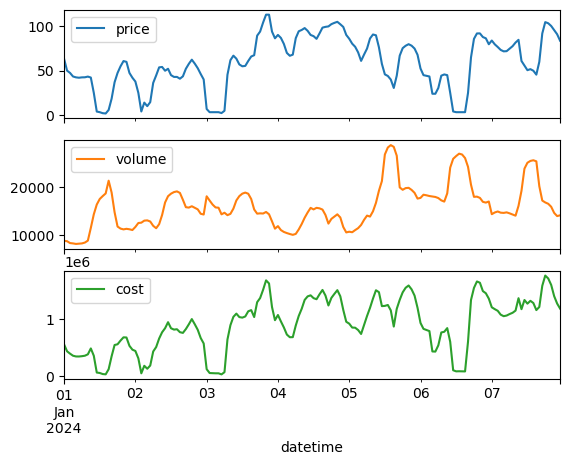

In [107]:
df.loc['2024-01-01':'2024-01-07'].plot(subplots=True)

,price,volume,cost
datetime,,,
2024-01-01 00:00:00,63.33,8744.9,553814.517
2024-01-01 01:00:00,50.09,8671.4,434350.426
...,...,...,...
2024-01-31 22:00:00,85.00,12171.6,1034586.000
2024-01-31 23:00:00,77.52,10826.8,839293.536


## Export to Excel

In [110]:
df.to_excel('../data/processed/2024-01.xlsx')